# IMPORTS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import math
import pandas_datareader as web

In [3]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout



D:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [5]:
%matplotlib inline

# IMPORTING DATA AND VISUALISATION

In [6]:
df = web.DataReader("SBIN.NS" , data_source="yahoo", start="2018-01-01" , end="2020-11-08")

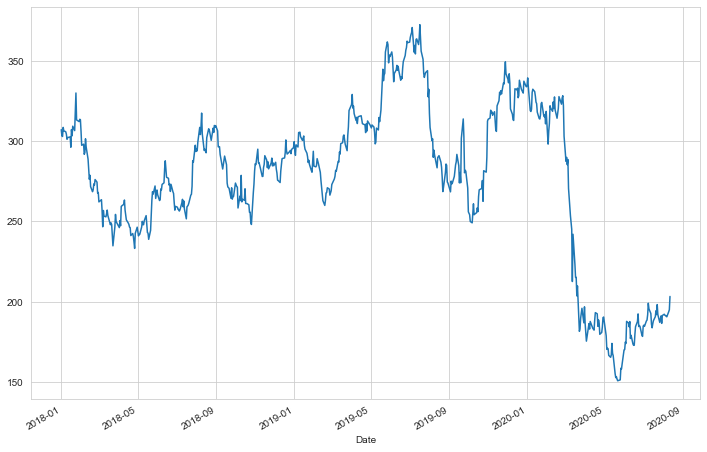

In [7]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
df["Close"].plot()  


In [8]:
df["High"].max()

373.79998779296875

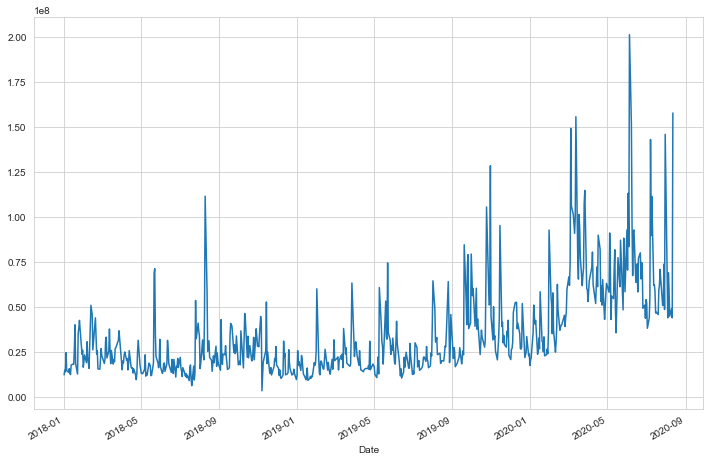

In [9]:
plt.figure(figsize=(12,8))
df["Volume"].plot()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 640 entries, 2018-01-01 to 2020-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       640 non-null    float64
 1   Low        640 non-null    float64
 2   Open       640 non-null    float64
 3   Close      640 non-null    float64
 4   Volume     640 non-null    float64
 5   Adj Close  640 non-null    float64
dtypes: float64(6)
memory usage: 35.0 KB


In [10]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,312.750000,306.299988,310.600006,307.100006,12182400.0,307.100006
2018-01-02,309.000000,301.350006,309.000000,303.250000,14797364.0,303.250000
2018-01-03,306.450012,302.149994,305.299988,302.850006,13857373.0,302.850006
2018-01-04,310.200012,303.149994,304.500000,308.500000,24517099.0,308.500000
2018-01-05,311.399994,305.600006,311.399994,306.350006,14580575.0,306.350006
2018-01-08,309.500000,305.000000,307.200012,305.799988,13557197.0,305.799988
2018-01-09,309.500000,303.299988,307.500000,304.299988,15574755.0,304.299988
2018-01-10,305.850006,300.000000,304.649994,301.100006,13064599.0,301.100006
2018-01-11,303.000000,300.000000,300.899994,302.200012,12298455.0,302.200012


In [11]:
df.rolling(7).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,309.828574,303.835711,307.928571,305.449999,1.558097e+07,305.449999
2018-01-10,308.842861,302.935713,307.078570,304.592856,1.570699e+07,304.592856
2018-01-11,307.985718,302.742855,305.921426,304.442858,1.535001e+07,304.442858


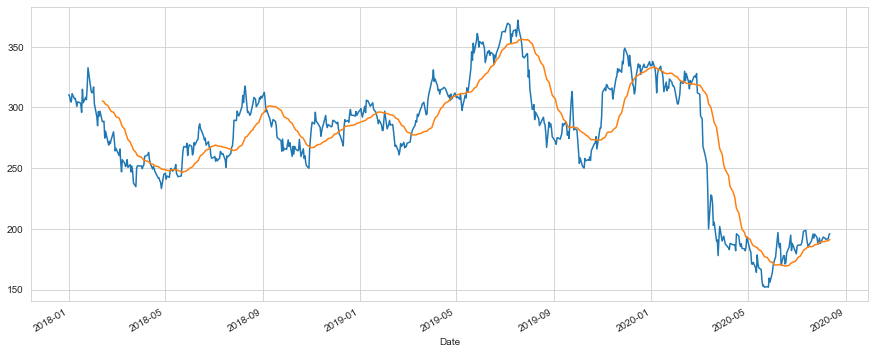

In [12]:
plt.figure(figsize=(15,6))
df["Open"].plot()
df.rolling(30).mean()["Open"].plot()

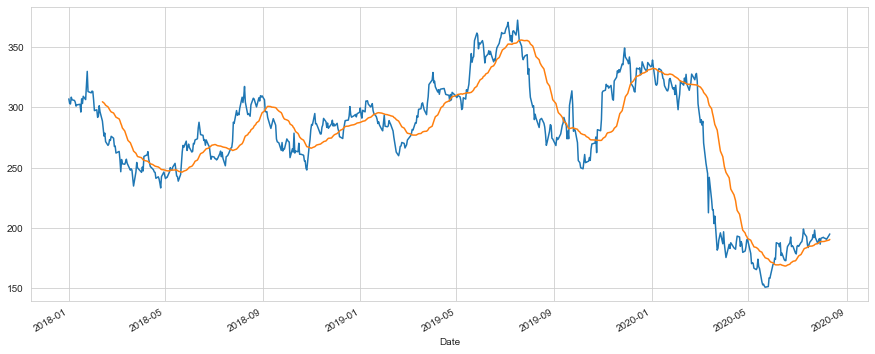

In [35]:
plt.figure(figsize=(15,6))
df["Close"].plot()
df.rolling(30).mean()["Close"].plot()

In [14]:
df.shape

(641, 6)

In [15]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-06,194.500000,190.250000,192.300003,190.949997,59740172.0,190.949997
2020-08-07,192.100006,189.550003,191.449997,190.649994,44822338.0,190.649994
2020-08-10,195.500000,191.699997,191.850006,193.800003,48784530.0,193.800003
2020-08-11,196.800003,193.750000,195.000000,195.050003,43890305.0,195.050003
2020-08-12,204.250000,194.600006,196.000000,203.300003,157777481.0,203.300003


# Creating training data

In [16]:
train_set = df["Open"]

In [17]:
train_set = pd.DataFrame(train_set)

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))


In [20]:
train_set_scaled = sc.fit_transform(train_set)

In [21]:
train_set_scaled

array([[7.21136355e-01],
       [7.13863601e-01],
       [6.97045365e-01],
       [6.93409057e-01],
       [7.24772663e-01],
       [7.05681839e-01],
       [7.07045419e-01],
       [6.94090847e-01],
       [6.77045394e-01],
       [6.94090847e-01],
       [6.90909112e-01],
       [6.83863575e-01],
       [6.54772696e-01],
       [7.41136326e-01],
       [6.90909112e-01],
       [7.10909083e-01],
       [7.02045392e-01],
       [7.53409108e-01],
       [8.21818139e-01],
       [7.32727208e-01],
       [7.27727181e-01],
       [7.32045418e-01],
       [7.49772661e-01],
       [6.86136302e-01],
       [6.39545396e-01],
       [6.04772699e-01],
       [6.57499996e-01],
       [6.40681760e-01],
       [6.59318150e-01],
       [6.19545425e-01],
       [6.21590935e-01],
       [5.58409011e-01],
       [5.84318155e-01],
       [5.43409067e-01],
       [5.32045432e-01],
       [5.46590941e-01],
       [5.38409040e-01],
       [5.52272758e-01],
       [5.82045428e-01],
       [5.50227248e-01],


In [23]:
train_set_scaled.shape

(641, 1)

In [29]:
train_set_scaled[61-60:61, 0]


array([0.7138636 , 0.69704536, 0.69340906, 0.72477266, 0.70568184,
       0.70704542, 0.69409085, 0.67704539, 0.69409085, 0.69090911,
       0.68386358, 0.6547727 , 0.74113633, 0.69090911, 0.71090908,
       0.70204539, 0.75340911, 0.82181814, 0.73272721, 0.72772718,
       0.73204542, 0.74977266, 0.6861363 , 0.6395454 , 0.6047727 ,
       0.6575    , 0.64068176, 0.65931815, 0.61954543, 0.62159094,
       0.55840901, 0.58431816, 0.54340907, 0.53204543, 0.54659094,
       0.53840904, 0.55227276, 0.58204543, 0.55022725, 0.51045452,
       0.51977265, 0.49318185, 0.51772728, 0.46863636, 0.43204544,
       0.47749998, 0.46431819, 0.45159091, 0.45704544, 0.47749998,
       0.44863632, 0.45886359, 0.43136365, 0.45363635, 0.43204544,
       0.39022727, 0.37636362, 0.4456818 , 0.45477271, 0.45386363])

In [30]:
train_set_scaled[61, 0]

0.44363636060982725

In [31]:
X_train = []
y_train = []
for i in range(60, 641):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
X_train.shape

(581, 60, 1)

In [37]:
y_train[1]

0.44363636060982725

In [34]:
y_train.shape

(581,)

# Building a model

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout

In [39]:
regressor = Sequential()

In [40]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [41]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [42]:
regressor.fit(X_train, y_train, epochs = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
581/581 [==============================] - 13s 22ms/sample - loss: 0.1153
Epoch 2/100
581/581 [==============================] - 5s 9ms/sample - loss: 0.0241
Epoch 3/100
581/581 [==============================] - 5s 9ms/sample - loss: 0.0193
Epoch 4/100
581/581 [==============================] - 7s 11ms/sample - loss: 0.0163
Epoch 5/100
581/581 [==============================] - 5s 9ms/sample - loss: 0.0138
Epoch 6/100
581/581 [==============================] - 5s 8ms/sample - loss: 0.0131
Epoch 7/100
581/581 [==============================] - 4s 7ms/sample - loss: 0.0122
Epoch 8/100
581/581 [==============================] - 5s 8ms/sample - loss: 0.0115
Epoch 9/100
581/581 [==============================] - 5s 9ms/sample - loss: 0.0108
Epoch 10/100
581/581 [==============================] - 5s 8ms/sample - loss: 0.0105
Epoch 11/100
581/581 [==============================] - 4s 8ms

581/581 [==============================] - 5s 8ms/sample - loss: 0.0036
Epoch 94/100
581/581 [==============================] - 5s 9ms/sample - loss: 0.0036
Epoch 95/100
581/581 [==============================] - 5s 8ms/sample - loss: 0.0040
Epoch 96/100
581/581 [==============================] - 4s 7ms/sample - loss: 0.0032
Epoch 97/100
581/581 [==============================] - 4s 8ms/sample - loss: 0.0034
Epoch 98/100
581/581 [==============================] - 4s 8ms/sample - loss: 0.0032
Epoch 99/100
581/581 [==============================] - 4s 7ms/sample - loss: 0.0040
Epoch 100/100
581/581 [==============================] - 5s 8ms/sample - loss: 0.0033


In [44]:
loss = pd.DataFrame(regressor.history.history)

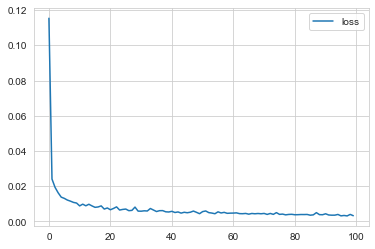

In [45]:
loss.plot()

# Creating a test set

In [46]:

df_test = web.DataReader("SBIN.NS" , data_source="yahoo", start="2017-08-01" , end="2017-12-30")

In [48]:
df_test.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-01,314.799988,307.950012,314.000000,309.000000,14888804,309.000000
2017-08-02,311.799988,305.299988,310.000000,307.700012,17005571,307.700012
2017-08-03,307.399994,299.100006,307.000000,300.549988,14459919,300.549988
2017-08-04,306.299988,297.600006,300.299988,305.250000,9615344,305.250000
2017-08-07,311.799988,305.149994,305.799988,311.200012,11420767,311.200012
2017-08-08,311.799988,301.200012,311.000000,303.649994,13578680,303.649994
2017-08-09,307.450012,300.100006,302.750000,302.299988,15852734,302.299988
2017-08-10,302.399994,292.000000,301.200012,296.700012,14519518,296.700012
2017-08-11,303.000000,277.450012,294.500000,280.149994,67652562,280.149994


In [49]:
test_set = df_test["Open"]

In [55]:
test_set = pd.DataFrame(test_set)

In [58]:
y_test = test_set[61:]

In [60]:
y_test.shape

(43, 1)

In [52]:
test_set_scaled = sc.transform(test_set)

In [61]:
test_set_scaled.shape

(104, 1)

In [65]:
X_test = []
for i in range(61, 104):
    X_test.append(test_set_scaled[i-60:i, 0])
    
X_test = np.array(X_test)

# Reshaping
X_test = np.reshape(X_test ,(X_test.shape[0], X_test.shape[1], 1))

In [66]:
X_test.shape

(43, 60, 1)

In [68]:
y_test.shape

(43, 1)

# Predicting the values

In [94]:
y_pred = regressor.predict(X_test)

In [95]:
 score = regressor.evaluate (X_train,y_train)

581/581 [==============================] - 1s 2ms/sample - loss: 0.0017


In [96]:
score

0.0017487833860671716

In [97]:
y_pred


array([[0.72036254],
       [0.75441337],
       [0.75227207],
       [0.74600565],
       [0.739421  ],
       [0.7434666 ],
       [0.75981164],
       [0.7660847 ],
       [0.7567897 ],
       [0.74351245],
       [0.7574971 ],
       [0.77948797],
       [0.79292685],
       [0.7953035 ],
       [0.8121786 ],
       [0.82533294],
       [0.82730246],
       [0.81737834],
       [0.8101271 ],
       [0.80861145],
       [0.8031258 ],
       [0.8032982 ],
       [0.8031585 ],
       [0.79415417],
       [0.77718073],
       [0.7532647 ],
       [0.72973406],
       [0.71792746],
       [0.7123655 ],
       [0.71474403],
       [0.72043175],
       [0.7275878 ],
       [0.7317828 ],
       [0.73070145],
       [0.73130184],
       [0.7226735 ],
       [0.72174877],
       [0.7277365 ],
       [0.7328915 ],
       [0.73562187],
       [0.7380101 ],
       [0.7377802 ],
       [0.73459226]], dtype=float32)

In [98]:
y_test = np.array(y_test)

In [99]:
y_pred = sc.inverse_transform(y_pred)

# Evaluating the model

In [117]:
y_pred_df=pd.DataFrame(y_pred, columns=["y_predicted"])

In [118]:
y_test_df=pd.DataFrame(y_test, columns=["y_true_values"])

In [119]:
compare = pd.concat([y_test_df,y_pred_df], axis=1)

In [121]:
compare

,y_true_values,y_predicted
0,313.000000,310.429779
1,309.399994,317.920959
2,320.000000,317.449860
3,315.450012,316.071259
4,323.600006,314.622650
5,328.950012,315.512665
6,318.000000,319.108582
7,313.149994,320.488647
8,315.000000,318.443756
9,336.750000,315.522736


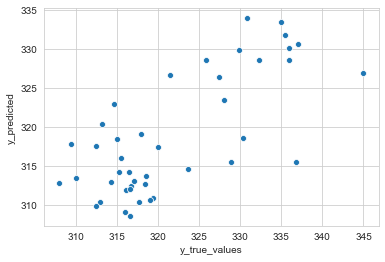

In [122]:
sns.scatterplot(x="y_true_values", y="y_predicted", data=compare)

In [123]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [124]:
mean_squared_error(y_test,y_pred)

49.52805286297185

In [125]:
mean_absolute_error(y_test,y_pred)

5.580564277116642

# Testing on new data

In [175]:
df_new = web.DataReader("SBIN.NS" , data_source="yahoo", start="2020-05-20" , end="2020-12-08")

In [176]:
df_new.shape

(60, 6)

In [177]:
new_data = df_new["Open"]

In [178]:
new_data = np.array(new_data)

In [180]:
new_data = new_data.reshape(-1,1)

In [181]:
new_data_scaled = sc.transform(new_data)

In [182]:
new_data_scaled.shape

(60, 1)

In [184]:
new_data_scaled = new_data_scaled.reshape(-1,1)

In [188]:
new_data_scaled = np.reshape(new_data_scaled ,(new_data_scaled.shape[1], new_data_scaled.shape[0], 1))

In [189]:
new_data_scaled.shape

(1, 60, 1)

In [190]:
new_pred = regressor.predict(new_data_scaled)

In [191]:
new_pred

array([[0.18813759]], dtype=float32)

In [192]:
value = sc.inverse_transform(new_pred)

In [193]:
value

array([[193.34027]], dtype=float32)